In [134]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray

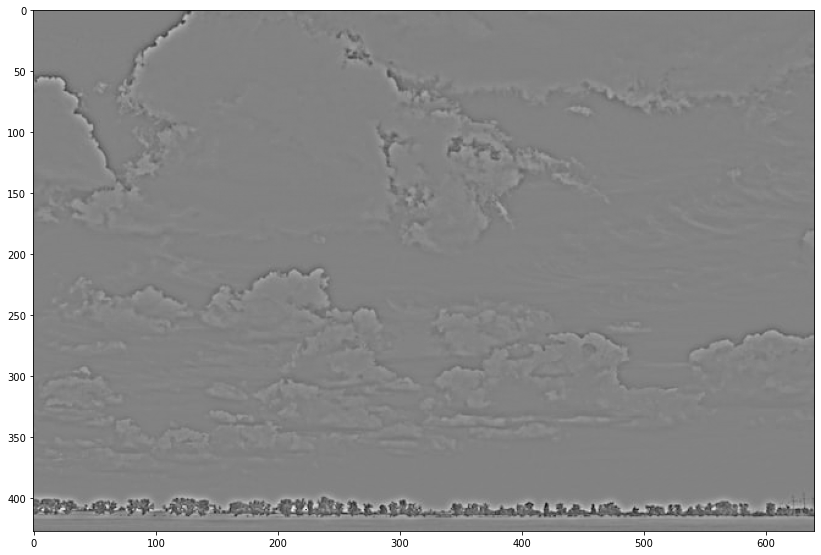

In [138]:
img1 = cv2.imread('../static/images/img2.jpg',0)
lpf = img1 -cv2.GaussianBlur(img1,(21,21),3)+127
plt.figure(figsize=(14, 18))
plt.imshow(lpf , cmap='gray')

In [ ]:
img1_fft = np.fft.fftshift(np.fft.fft2(img1))
img1_amplitude = np.sqrt(np.real(img1_fft) ** 2 + np.imag(img1_fft) ** 2)
img1_phase = np.arctan2(np.imag(img1_fft), np.real(img1_fft))

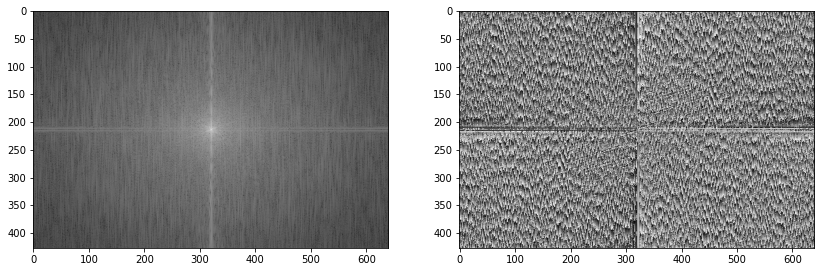

In [ ]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(img1_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(img1_phase, cmap='gray')

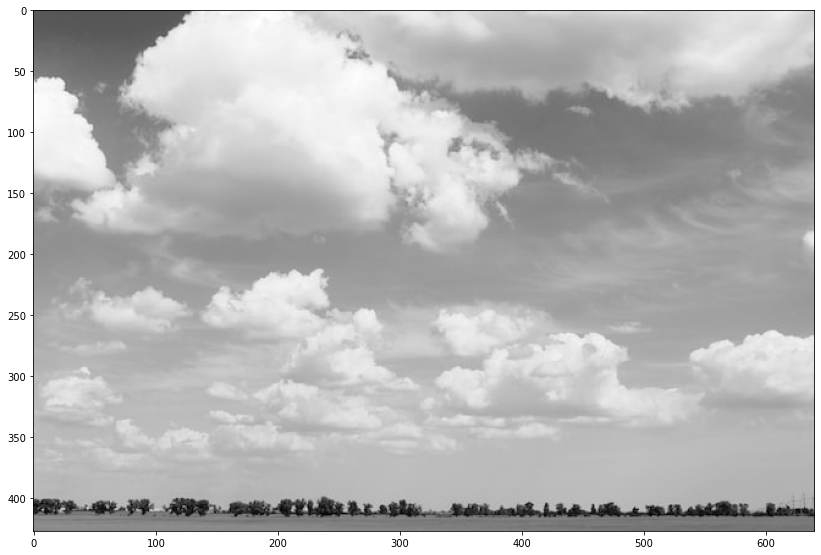

In [ ]:
img2 = cv2.imread('../static/images/img2.jpg',0)
plt.figure(figsize=(14, 18))
plt.imshow(img2,cmap='gray')

In [ ]:
img2_fft = np.fft.fftshift(np.fft.fft2(img2))
img2_amplitude = np.sqrt(np.real(img2_fft) ** 2 + np.imag(img2_fft) ** 2)
img2_phase = np.arctan2(np.imag(img2_fft), np.real(img2_fft))

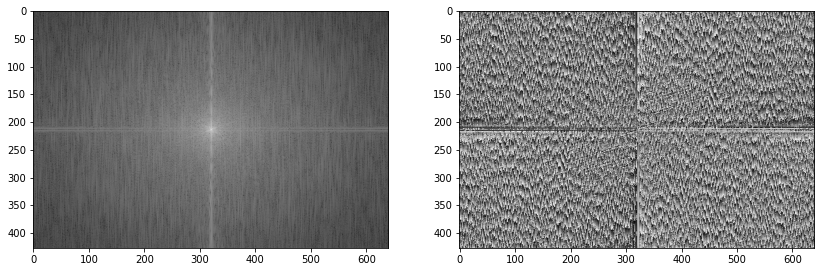

In [ ]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(img2_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(img2_phase, cmap='gray')

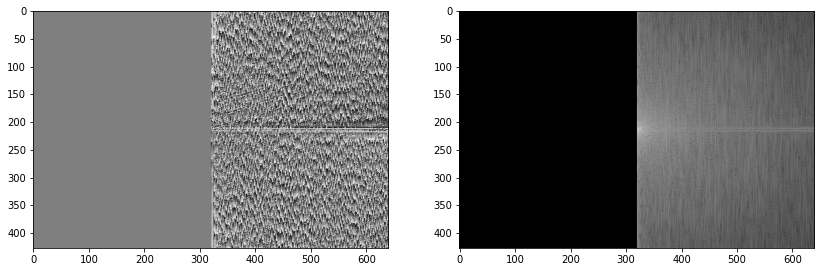

In [ ]:
for x in range (0,img1_phase.shape[0]):
    for y in range(0,img1_phase.shape[1]):
        if (x>=0 and x<=427 )and(y>=320 and y<=640):
            pass
        else:
            img1_phase[x][y] = 0

for x in range (0,img1_amplitude.shape[0]):
    for y in range(0,img1_amplitude.shape[1]):
        if (x>=0 and x<=427 )and(y>=320 and y<=640):
            pass
        else:
            img1_amplitude[x][y] = 1

plt.figure(figsize=(14,18))
plt.subplot(121)
plt.imshow(img1_phase,cmap='gray')
plt.subplot(122)
plt.imshow(np.log(img1_amplitude+1e-10),cmap='gray')

In [ ]:
comb = np.multiply(img2_amplitude, np.exp(1j * img1_phase))
trans = np.real(np.fft.ifft2(np.fft.ifftshift(comb)))

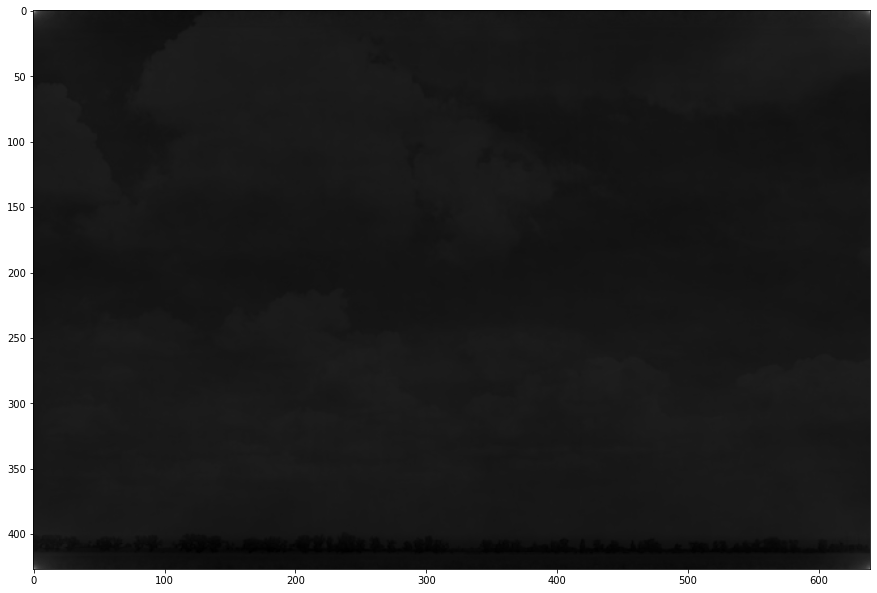

In [ ]:
plt.figure(figsize=(15, 20))
plt.imshow(np.abs(trans), cmap='gray')

In [ ]:
plt.imsave('result.jpg',trans,cmap='gray')